https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_partial_dependence_visualization_api.html#sphx-glr-auto-examples-miscellaneous-plot-partial-dependence-visualization-api-py

https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html#sphx-glr-auto-examples-inspection-plot-partial-dependence-py

https://medium.com/@leetandata

# Machine Learning and Statisitics 2020

## Project 2020

### Student ID: Claire Nolan G00376464

In [31]:
# Neural networks.
import tensorflow.keras as kr

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

import seaborn as sns

import sklearn as sk
import sklearn.cluster as skcl
from sklearn.model_selection import train_test_split

In [32]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor


In [33]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

In [34]:
# Import the dataset

df = pd.read_csv("https://raw.githubusercontent.com/ClaireGMIT/MLS_Project2020/main/powerproduction.csv") 
#df.to_numpy()
print(df.shape)
df.describe().transpose()

(500, 2)


,count,mean,std,min,25%,50%,75%,max
speed,500.0,12.590398,7.224991,0.0,6.32475,12.5505,18.77525,25.00
power,500.0,48.014860,41.614565,0.0,5.28750,41.6450,93.54000,113.56


In [35]:
X = df['speed']
y = df['power']

#min_y = min(y)
#max_y = max(y)

In [36]:
#Best fit straight line
X_avg = np.mean(X)
y_avg = np.mean(y)

X_zero = X - X_avg
y_zero = y - y_avg

m = np.sum(X_zero * y_zero)/(np.sum(X_zero * X_zero))
c = y_avg - m * X_avg

In [37]:
#Best fit sigmoid curve
from scipy.optimize import curve_fit

def sigmoid(X, L, X0, k, b):
    s = L / (1 + np.exp(-k*(X-X0)))+b
    return(y)


p0 = [max(y), np.median(X), 1, min(y)]

popt, pcov = curve_fit(sigmoid, X, y, p0, method='dogbox')

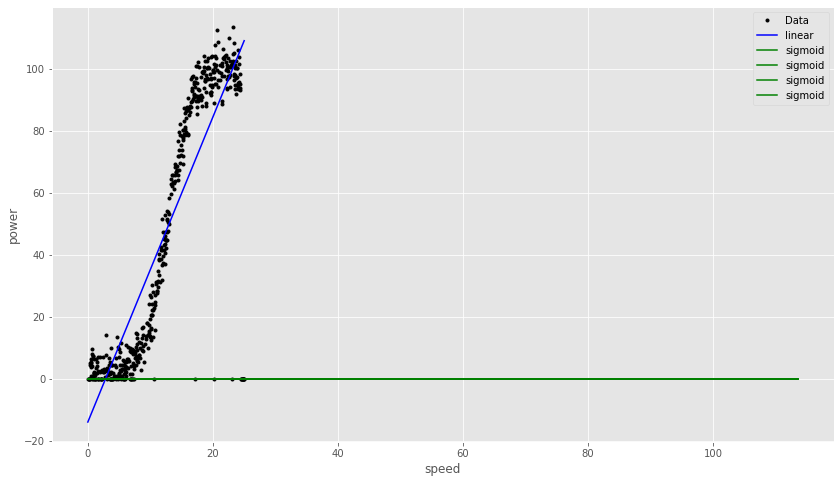

In [38]:
#Best fit straight line
plt.plot(X, y,'k.', label="Data")

plt.plot(X, m * X + c, 'b-', label="linear")#plot best fit straight line

plt.plot(popt, pcov, 'g-', label="sigmoid")

plt.xlabel('speed')
plt.ylabel('power')

plt.legend()
plt.show()

In [39]:
target_column = ['power'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
speed,500.0,0.503616,0.289000,0.0,0.25299,0.50202,0.75101,1.00
power,500.0,48.014860,41.614565,0.0,5.28750,41.64500,93.54000,113.56


In [40]:
X = df['speed']
y = df['power']

In [41]:
X, y = make_regression(n_samples=200, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

regr = MLPRegressor(random_state=1, max_iter=10000).fit(X_train, y_train)
regr.predict(X_test[:2])

regr.score(X_test, y_test)


predict_train = regr.predict(X_train)
predict_test = regr.predict(X_test)

